<h1><center><font color=darkblue>ANALISIS DE LA DEMANDA ELÉCTRICA 2019</font></center></h1>

In [1]:
# Importando librerias principales (generales) ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1. Data

Para analizar la máxima demanda necesitaremos una base de datos de la demanda eléctrica del SEIN.

- En la web del COES proporcionan data de la demanda eléctrica pero con una resolución de 30 minutos: http://www.coes.org.pe/Portal/portalinformacion/demanda. Sin embargo, en su reporte de día máxima demanda utilizan data de 15 min de resolución. Descartamos esta data de 30 min.


- No obstante, para obtener la Demanda Total del SEIN, necesitamos: <b>Demanda = Generación + Intercambios</b>


- Se obtiene data de la <b>Generación</b> eléctrica (Generación en Bornes), con una resolución de 15 minutos, en: http://www.coes.org.pe/Portal/mediciones/medidoresgeneracion.


- Se obtiene data de los <b>Intercambios</b> (Interconexión Zorritos-Machala), con una resolución de 15 minutos, en. https://www.coes.org.pe/Portal/Interconexiones/Reportes/ContadoresEnergia/.

Los archivos ya descargados y limpiados se pueden encontrar en la carpeta <b><i>data</i></b> dentro del repositorio: https://github.com/KevinAQM/Electricity_Demand_Peru_2019.

Ahora que tenemos la data completa en nuestro archivo CSV llamado <b>"Demand_PE_2019_15min"</b> pasamos a cargarlo a nuestro <i>"Notebook"</i> de Jupyter para analizarlo.


In [2]:
# Cargando archivo ---
data = pd.read_csv("data/Demand_PE_2019_15min.csv",
                        parse_dates=[0], index_col=0, dayfirst=1)

In [3]:
# Observando nuestra data ---
data

,Generacion Total [MW],Exportacion [MW],Importacion [MW],Demanda Total [MW]
Fecha,,,,
2019-01-01 00:00:00,5708.87385,0.0,0.0,5708.87385
2019-01-01 00:15:00,5554.09774,0.0,0.0,5554.09774
2019-01-01 00:30:00,5507.87057,0.0,0.0,5507.87057
2019-01-01 00:45:00,5470.88846,0.0,0.0,5470.88846
2019-01-01 01:00:00,5434.64513,0.0,0.0,5434.64513
2019-01-01 01:15:00,5393.99744,0.0,0.0,5393.99744
2019-01-01 01:30:00,5354.60283,0.0,0.0,5354.60283
2019-01-01 01:45:00,5317.57860,0.0,0.0,5317.57860
2019-01-01 02:00:00,5259.28723,0.0,0.0,5259.28723


Sin embargo, para nuestro análisis, solo vamos a usar la última columna 'Demanda Total [MW]'. Creamos un nuevo dataframe:

In [4]:
#Nuevo dataframe "demand"
demand = data.drop(data.columns[:3], axis=True)

#Renombrando columna a "Demanda SEIN"
demand.rename(columns={'Demanda Total [MW]':'Demanda SEIN'}, inplace = True)
demand

,Demanda SEIN
Fecha,
2019-01-01 00:00:00,5708.87385
2019-01-01 00:15:00,5554.09774
2019-01-01 00:30:00,5507.87057
2019-01-01 00:45:00,5470.88846
2019-01-01 01:00:00,5434.64513
2019-01-01 01:15:00,5393.99744
2019-01-01 01:30:00,5354.60283
2019-01-01 01:45:00,5317.57860
2019-01-01 02:00:00,5259.28723


In [5]:
# Información general ---
# Observamos que hay 35040 entradas (1 entrada cada 15 min), sin entrada nulas
demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2019-01-01 00:00:00 to 2019-12-31 23:45:00
Data columns (total 1 columns):
Demanda SEIN    35040 non-null float64
dtypes: float64(1)
memory usage: 547.5 KB


In [6]:
# Estadísticas principales ---
demand.describe()

,Demanda SEIN
count,35040.000000
mean,6044.442311
std,545.138640
min,4364.215490
25%,5537.312865
50%,6170.071075
75%,6508.256925
max,7107.550280


## 2. Gráficos y tendencias

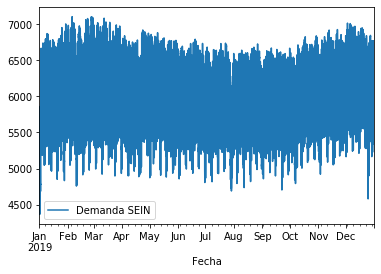

In [7]:
# Data original: 15 min ---
demand.plot()

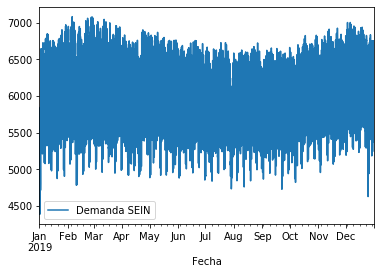

In [8]:
# Moving Average de 1 hora: 15min*4 ---

demand_MA_hourly = demand.rolling(window=4).mean()
demand_MA_hourly.plot()

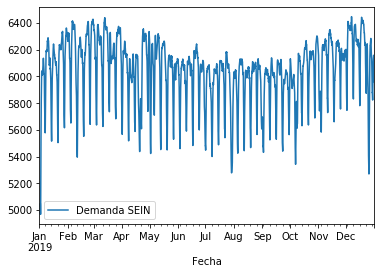

In [9]:
# Moving Average de 1 día: 15min*4*24 ---

demand_MA_daily = demand.rolling(window=96).mean()
demand_MA_daily.plot()

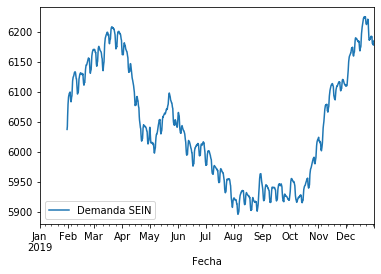

In [10]:
# Moving Average de 1 mes: 15min*4*24*30 ---

demand_MA_monthly = demand.rolling(window=2880).mean()
demand_MA_monthly.plot()

## 3. Diagrama de Carga

### 3.1 Diagrama de Carga - Promedio Anual

In [11]:
# Obteniendo un promedio anual para cada instante ---
by_time = demand.groupby(demand.index.time).mean()
by_time

,Demanda SEIN
00:00:00,5802.013261
00:15:00,5717.139178
00:30:00,5649.060822
00:45:00,5591.831915
01:00:00,5538.784004
01:15:00,5489.238858
01:30:00,5447.550854
01:45:00,5414.008395
02:00:00,5373.498447
02:15:00,5345.774941


In [12]:
# Observamos que hay 96 instancias de tiempo (cada 15 min) ---
by_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 00:00:00 to 23:45:00
Data columns (total 1 columns):
Demanda SEIN    96 non-null float64
dtypes: float64(1)
memory usage: 1.5+ KB


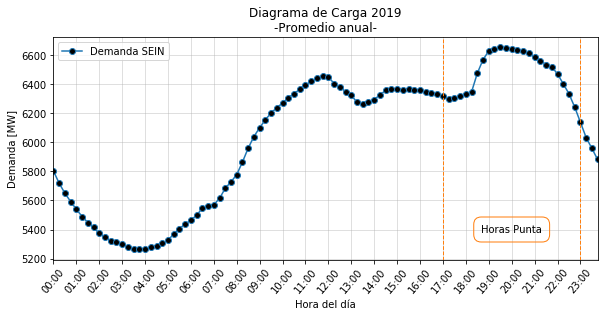

In [13]:
# Diagrama de carga 2019 - promedio anual ---
# Este diagrama es solo para ver la forma de la curva de demanda
# Para fines de análisis y de proyecciones se debe usar el día de máxima demanda
# Acá no señalo (marcador) el Ymáx (demanda máxima) porque solo es un promedio anual para visualización

hourly_ticks = 1*60*60*np.arange(24) #Marcas (espaciado) del eje x

by_time.plot(xticks=hourly_ticks, figsize=(8.5, 4.5), style=['-o'], markerfacecolor='black')
plt.title('Diagrama de Carga 2019\n-Promedio anual-')
plt.legend(('Demanda SEIN',))
plt.xlabel('Hora del día')
plt.ylabel('Demanda [MW]')
plt.xticks(rotation=50)
plt.axvline("17:00", color="C1", linestyle="--", lw=1, alpha=1, label='vertical line')
plt.axvline("23:00", color="C1", linestyle="--", lw=1, alpha=1, label='vertical line')
plt.text("20:00", 5400, 'Horas Punta', bbox=dict(fc='none', ec='C1', boxstyle='round,pad=0.75'), ha='center', va='center')
plt.grid(True, lw=0.8, alpha=0.5)

plt.tight_layout()
plt.show()

### 3.2 Diagrama de Carga - Promedio Mensual

In [14]:
# Separando diagrama de carga por meses
by_time_month = []
for i in range(12):
    b_t_m = demand[f'2019-{i+1}'].groupby(demand[f'2019-{i+1}'].index.time).mean()
    by_time_month.append(b_t_m)
    i+=1

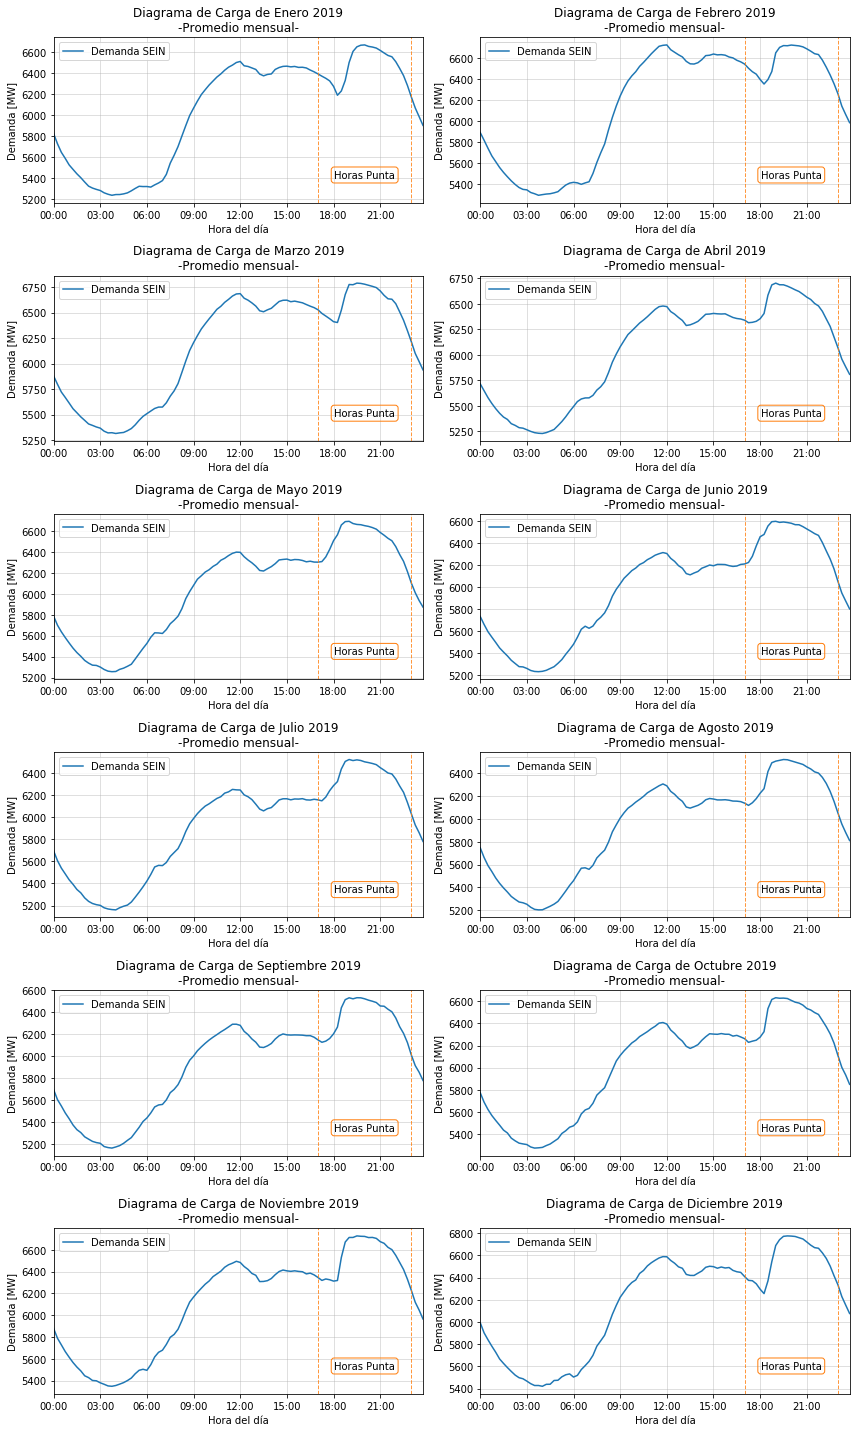

In [15]:
# Diagrama de carga - promedio mensual ---
# Este diagrama es solo para ver la forma de la curva de demanda
# Para fines de análisis y de proyecciones se debe usar el día de máxima demanda
# Acá no señalo (marcador) el Ymáx (demanda máxima) porque solo es un promedio mensual para visualización

hourly_ticks_3 = 3*60*60*np.arange(8) #Marcas (espaciado) del eje x

months = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 20)) #Graficando en subplots

for by_month, ax, month in zip(by_time_month, fig.get_axes(), months):
    ax.plot(by_month, label='Demanda SEIN')
    ax.set_xticks(hourly_ticks_3)
    ax.set_title('Diagrama de Carga de ' + month + ' 2019' + '\n-Promedio mensual-')
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Demanda [MW]')
    ax.set_xlim("00:00", "23:45")
    ax.axvline("17:00", color="C1", linestyle="--", lw=1, alpha=0.8)
    ax.axvline("23:00", color="C1", linestyle="--", lw=1, alpha=0.8)
    ax.text("20:00", 0.15, 'Horas Punta', transform=ax.get_xaxis_transform(), 
            bbox=dict(fc='none', ec='C1', boxstyle='round'), ha='center')
    ax.grid(True, lw=0.8, alpha=0.5)
    ax.legend()
    
plt.tight_layout()

### 3.3 Diagrama de Carga - Día de Máxima Demanda Mensual

In [16]:
#Muestra la maxima demanda mensual sin mostrar el día y la hora en la que ocurre ---
#Te muestra la demanda máxima como un punto al final del mes
max_monthly_demand = demand.resample('M').max()
max_monthly_demand

,Demanda SEIN
Fecha,
2019-01-31,7006.35034
2019-02-28,7107.55028
2019-03-31,7085.87830
2019-04-30,6919.38664
2019-05-31,6884.74712
2019-06-30,6794.00608
2019-07-31,6739.28121
2019-08-31,6728.48046
2019-09-30,6672.27642


In [17]:
#Muestra la maxima demanda mensual, ademas muestra el día y la hora en la que ocurre ---
day_max_monthly_demand = demand.loc[demand.groupby(pd.Grouper(freq='M')).idxmax().iloc[:, 0]]
day_max_monthly_demand

,Demanda SEIN
Fecha,
2019-01-29 15:45:00,7006.35034
2019-02-05 15:45:00,7107.55028
2019-03-12 12:00:00,7085.87830
2019-04-23 15:30:00,6919.38664
2019-05-09 19:00:00,6884.74712
2019-06-19 18:00:00,6794.00608
2019-07-22 20:30:00,6739.28121
2019-08-26 19:30:00,6728.48046
2019-09-10 18:45:00,6672.27642


Construimos el código para realizar la gráfica del Día de Máxima Demanda Mensual.

In [18]:
#Creamos una función (puesto que vamos a volver a usar el código más adelante)
#Como input:
def Graph(variable):    
    date_max = variable.index[:].format() #Extrae los índices (fecha) como tipo string en una lista
    date_max[:] = (elem[:10] for elem in date_max) #Recorta los elementos de la lista a "yy:MM:dd" in-situ

    hour_max = variable.index[:].format() #Extrae los índices (fecha) como tipo string en una lista
    hour_max[:] = (elem[11:] for elem in hour_max) #Recorta los elementos de la lista a "hh:mm" in-situ

    days = date_max[:] #Copia los índices (fecha) como tipo string en otra lista
    days[:] = (elem[-2:] for elem in days) #Recorta los elementos de la lista a "dd" in-situ
    
    by_time_month_max = [] #Obteniendo el perfil diario de cada día de máxima demanda mensual
    for day in date_max:
        b_t_m_m = demand[day].groupby(demand[day].index.time).max()
        by_time_month_max.append(b_t_m_m)

    x_max_day = hour_max #Abcisa de la máxima demanda

    y_max_day = variable['Demanda SEIN'].tolist() #Ordenada de la máxima demanda
    
    hourly_ticks_3 = 3*60*60*np.arange(8) #Marcas (espaciado) del eje x

    months = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
              'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')

    fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(13, 22)) #Graficando en subplots

    for by_month_max, day, month, ax, x, y in zip(by_time_month_max, days, months, fig.get_axes(), x_max_day, y_max_day):
        ax.plot(by_month_max, label='Demanda SEIN')
        ax.set_xticks(hourly_ticks_3)
        ax.set_title(f'Día de Máxima Demanda Mensual\n{day} de {month} del 2019')
        ax.set_xlabel('Hora del día')
        ax.set_ylabel('Demanda [MW]')
        ax.set_xlim("00:00", "23:45")
        ax.axvline("17:00", color="C1", linestyle="--", lw=1, alpha=0.8)
        ax.axvline("23:00", color="C1", linestyle="--", lw=1, alpha=0.8)
        ax.text("20:00", 0.10, 'Horas Punta', transform=ax.get_xaxis_transform(),
                bbox=dict(fc='none', ec='C1', boxstyle='round'), ha='center')
        ax.grid(True, lw=0.8, alpha=0.5)
        ax.annotate("{:.3f} MW\n{:.5} h".format(y, x), xy=(x, y), xytext=(x, y-600), 
                    arrowprops=dict(arrowstyle='->', color='r'), 
                    bbox=dict(boxstyle="round", fc="w", ec='0.5', alpha=1), ha='center', va='center')
        ax.legend()
        
    plt.tight_layout()
    plt.savefig('DíaMáximaDemanda.png', dpi = 250)

Una vez que tenemos definida la función simplemente le pasamos un argumento válido, en este caso es el dataframe que contiene los días de máxima demanda mensual.

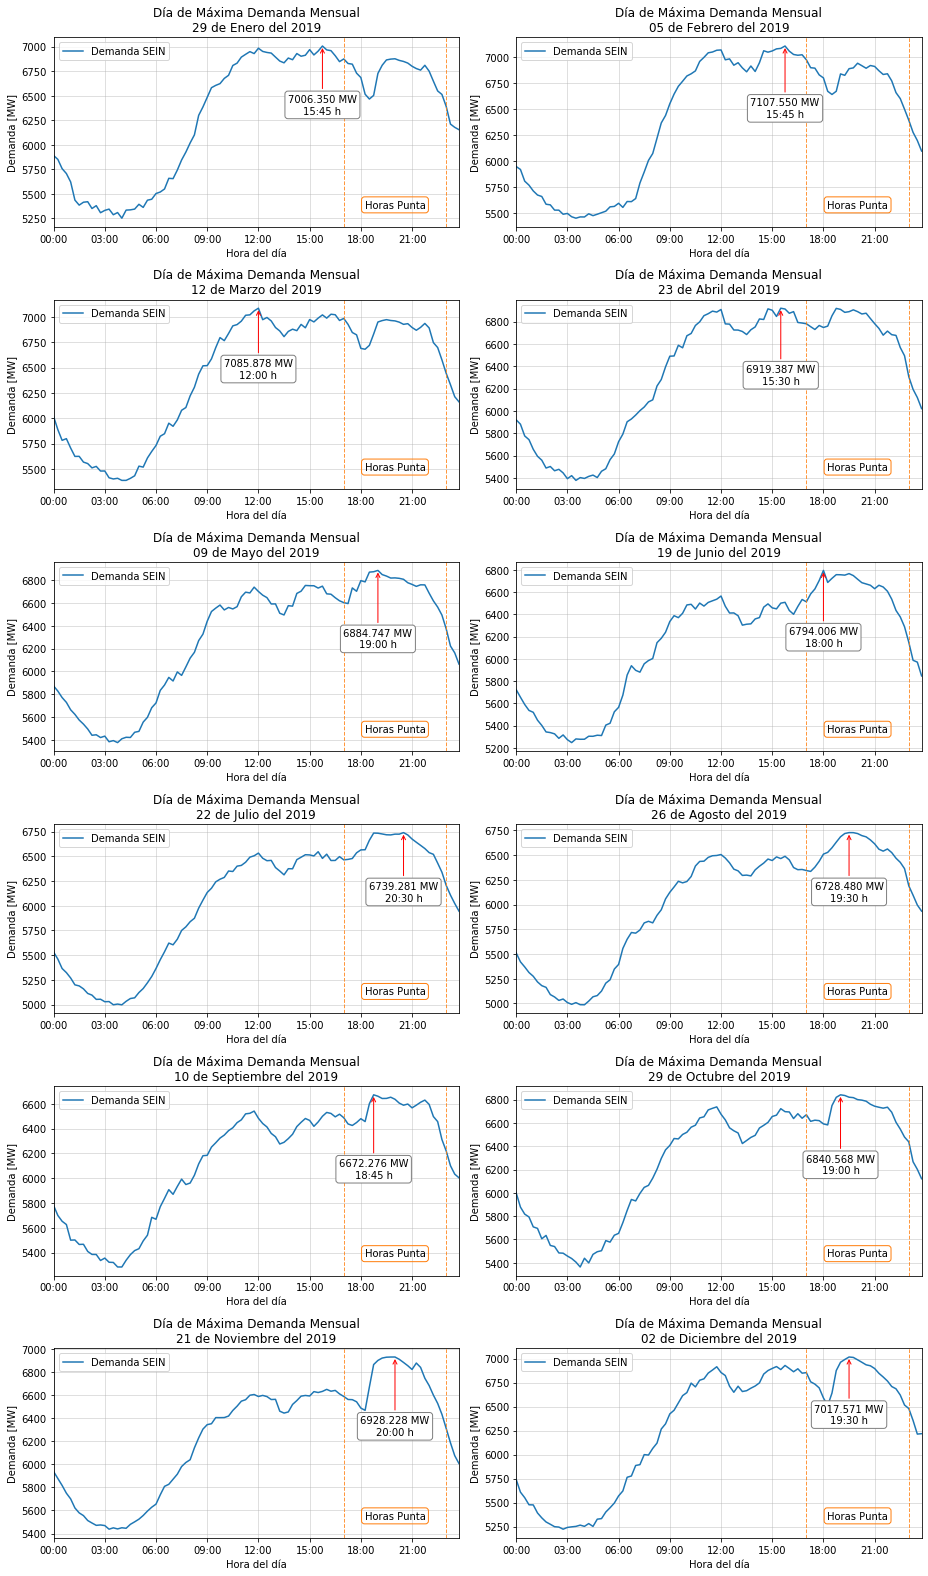

In [19]:
#Llamando a la función Graph, como input: day_max_monthly_demand
Graph(day_max_monthly_demand)

Como se puede observar de la gráfica anterior, la máxima demanda puede caer dentro o fuera de las Horas Punta.

Ahora, si comparamos nuestras <b>máximas demandas mensuales encontradas</b> con el <b>Reporte del Coes de Máxima Demanda</b> [(Web)](http://www.coes.org.pe/Portal/portalinformacion/demanda?indicador=maxima), observamos que no se corresponden en algunos meses (enero, febrero, marzo y abril). Esto se debe a que en estos meses la máxima demanda se da en Horas Fuera de Punta (HFP) y el COES, para el análisis de máxima demanda, solo toma en cuenta el valor máximo dentro de las Horas de Punta (HP) ([D.S. N° 044-2017](https://busquedas.elperuano.pe/normaslegales/decreto-supremo-que-aprueba-reglas-para-la-determinacion-de-decreto-supremo-n-044-2017-em-1601502-9/)).

Las reglas del juego son las que son. Entonces, definimos un nuevo DataFrame solo para las Horas Punta del Sistema (descartando las demás horas).

In [20]:
#La misma base de datos pero solo tomando las horas de punta.
hp = demand.between_time("17:00", "23:00")

In [21]:
#Muestra la maxima demanda mensual, ademas muestra el día y la hora en la que ocurre ---
day_max_monthly_hp = hp.loc[hp.groupby(pd.Grouper(freq='M')).idxmax().iloc[:, 0]]
day_max_monthly_hp

,Demanda SEIN
Fecha,
2019-01-29 20:00:00,6876.29244
2019-02-05 17:00:00,6975.04915
2019-03-25 19:00:00,6990.66898
2019-04-23 18:45:00,6917.73939
2019-05-09 19:00:00,6884.74712
2019-06-19 18:00:00,6794.00608
2019-07-22 20:30:00,6739.28121
2019-08-26 19:30:00,6728.48046
2019-09-10 18:45:00,6672.27642


Sin embargo, al seleccionar el inicio de las HP como "17:00" la máxima demanda mensual para febrero sería el "2019-02-05 17:00:00", justo en el límite inferior. Sin embargo la web del COES reporta la máxima demanda para febrero el "2019-02-04 20:00:00". Esto nos da a entender, que no se toman los extremos del bloque de las horas punta. Por eso, volvemos a definir la HP, ahora entre los siguientes valores:

In [22]:
hp = demand.between_time("17:01", "22:59")

In [23]:
#Muestra la maxima demanda mensual, ademas muestra el día y la hora en la que ocurre ---
day_max_monthly_hp = hp.loc[hp.groupby(pd.Grouper(freq='M')).idxmax().iloc[:, 0]]
day_max_monthly_hp

,Demanda SEIN
Fecha,
2019-01-29 20:00:00,6876.29244
2019-02-04 20:00:00,6949.99689
2019-03-25 19:00:00,6990.66898
2019-04-23 18:45:00,6917.73939
2019-05-09 19:00:00,6884.74712
2019-06-19 18:00:00,6794.00608
2019-07-22 20:30:00,6739.28121
2019-08-26 19:30:00,6728.48046
2019-09-10 18:45:00,6672.27642


¡LISTO! Todos las fechas (día y hora) y valores (MW) concuerdan con lo muestra el COES en sus reportes mensuales de máxima demanda.

- Solo hay un pequeño error (de data, mas no de código). La máxima demanda en el mes de Junio se da el día "2019-06-19 18:00:00". La WEB del COES reporta: <b>6793.768 MW</b>, mientras que nuestro análisis muestra que fue de <b>6794.006 MW</b>, es decir una desviación de <b>-0.238 MW</b>. Esto quiere decir que en este punto hubo una <b>exportación</b> de 0.238 MW. Sin embargo en la WEB del COES no existe ningún archivo de Intercambio para la fecha del 19 de Junio de 2019. Un análisis más profundo de este error lo muestro en el archivo <i>"Diferencias entre Demanda y Generación = Intercambios"</i>, dentro de la carpeta: https://github.com/KevinAQM/Electricity_Demand_Peru_2019\data\Demanda_COES_2019

Volvemos a graficar:

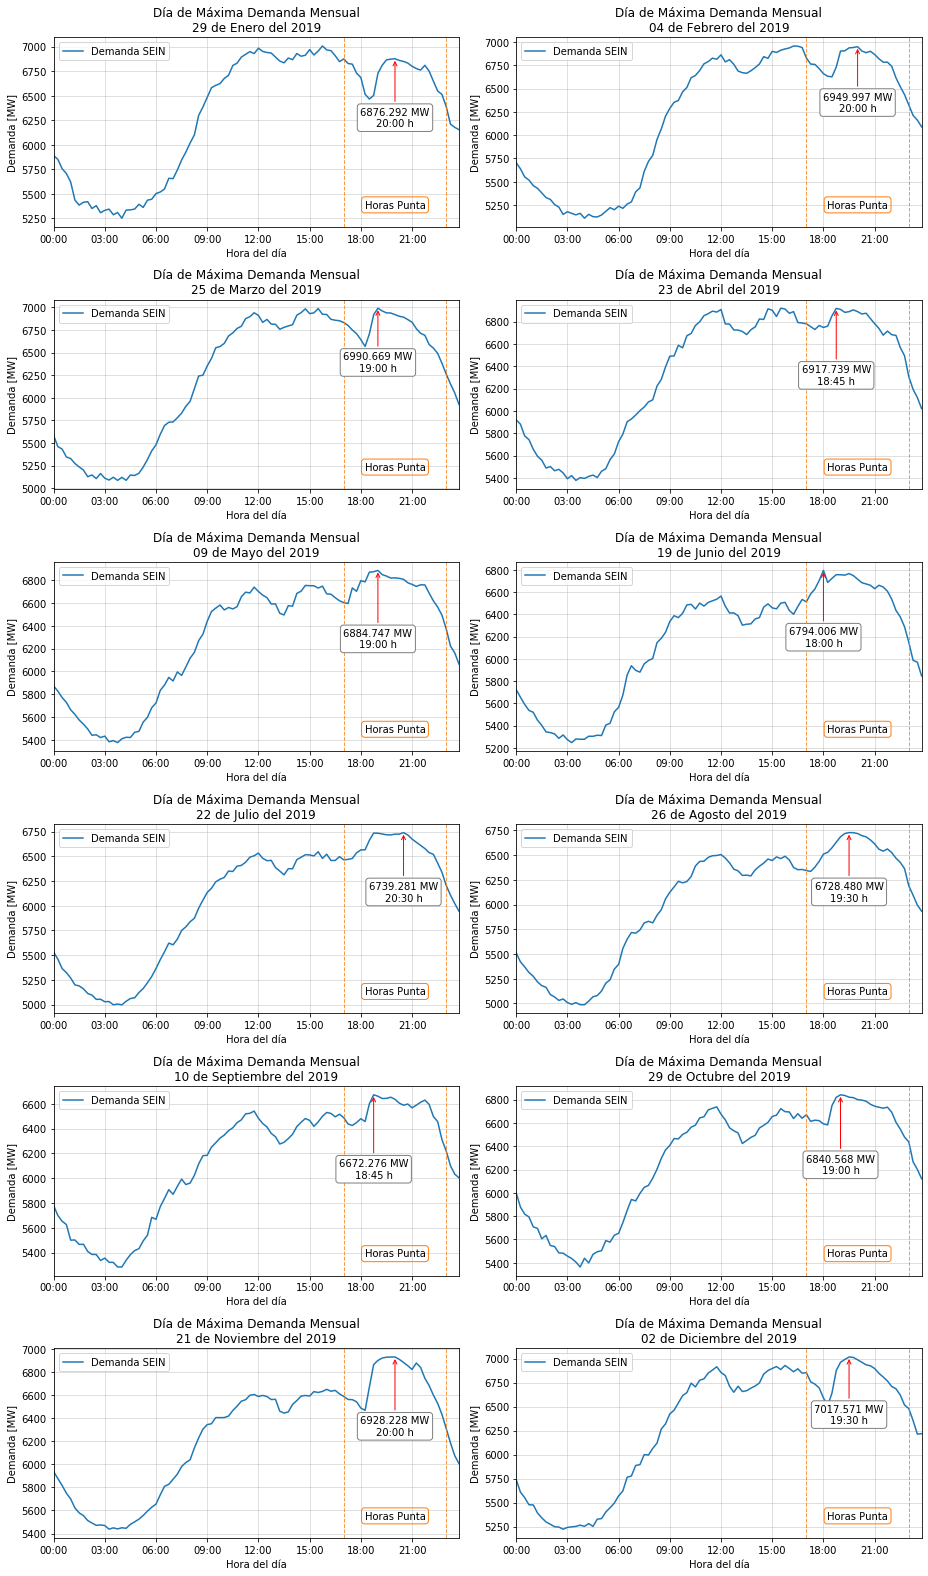

In [24]:
Graph(day_max_monthly_hp)

### 3.4 Máxima demanda diaria

#Falta terminar